<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.signal
import matplotlib.dates as dates


In [2]:
name = 'himalayas'
df20 = pd.read_csv(f"accelogw_{name}_hotspot@70hPa_20dayts_indexes.csv")
df20.head()

Unnamed: 0   BeginDate      oGWD
0           0  1979-01-16 -7.567315
1           1  1979-02-20 -7.205753
2           2  1981-02-21 -8.691035
3           3  1982-01-21 -6.814002
4           4  1982-02-20 -7.509872

time    plev      oGWD
0 1979-01-01  7000.0 -1.062378
1 1979-01-02  7000.0 -1.030545
2 1979-01-03  7000.0 -1.483128
3 1979-01-04  7000.0 -1.021822
4 1979-01-05  7000.0 -1.749732

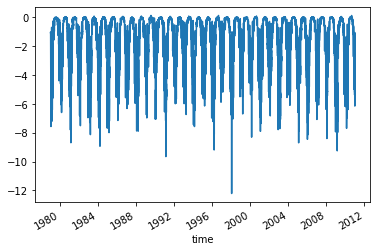

In [3]:
df = pd.read_csv("accelogw_{}_hotspot@70hPa_ts.csv".format(name), parse_dates=True)
df['time'] = df.time.apply(lambda t: pd.to_datetime(t, format='%Y-%m-%d'))
df.set_index('time').oGWD.plot()
df.head()

In [6]:
inter_sample_time = df['time'][1] - df['time'][0]
sampling_freq =  1 / inter_sample_time.total_seconds()
sampling_freq

1.1574074074074073e-05

In [6]:
sampling_freq*24*3600

1.0

In [7]:
max_ind = 2**(int(np.floor(np.log2(len(df)))))
V_trunc = df['oGWD'].values[:max_ind]

# Determine frequencies
f = np.fft.fftfreq(len(V_trunc)) * sampling_freq

# Compute power spectral density
psd = np.abs(np.fft.fft(V_trunc))**2 / len(V_trunc)

# Make into DataFrame to enable DataShaded viewing
df_psd = pd.DataFrame(data={'f (Hz)': f[f>=0], 'PSD': psd[f>=0]})

<AxesSubplot:xlabel='f (Hz)'>

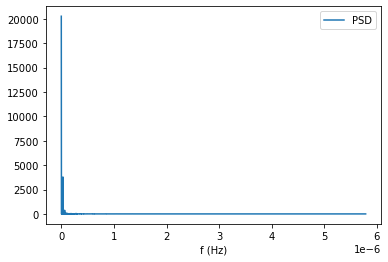

In [8]:
df_psd.plot(x = 'f (Hz)', y = 'PSD')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
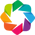

Loading BokehJS ...

In [11]:
import holoviews as hv
import holoviews.operation.datashader
hv.extension('bokeh')

import bokeh
bokeh.io.output_notebook()

In [27]:
1/3.2e-8/86400.0

361.6898148148148

In [28]:
1/6.4e-8/86400.0

180.8449074074074

In [35]:
1/2.797e-7/86400.0

41.38031488764417

In [36]:
1/4.888e-7/86400.0

23.67854761471783

In [37]:
1/5.962e-7/86400.0

19.413072918607973

In [12]:
# Make plot
hv.operation.datashader.datashade(
    hv.Curve(
        data=df_psd,
        kdims=['f (Hz)'],
        vdims=['PSD']
    ),
    aggregator='any',
).opts(
    frame_height=300,
    frame_width=625,
    show_grid=True,
)

:DynamicMap   []
   :RGB   [f (Hz),PSD]   (R,G,B,A)

In [19]:
to_daily = lambda x: x**-1/(24*3600.)

In [20]:
to_daily(3.108e-8)

372.3962057295391

In [23]:
to_daily(6.358e-8)

182.0395419011336

In [24]:
to_daily(9.466e-8)

122.26995641320595

In [25]:
to_daily(2.797e-7)

41.38031488764417

In [26]:
to_daily(2.5e-7)

46.2962962962963

In [13]:
hv.Curve(
    data=df_psd,
    kdims=['f (Hz)'],
    vdims=['PSD']
).opts(
    frame_height=300,
    frame_width=625,
    show_grid=True, tools=['hover'])

:Curve   [f (Hz)]   (PSD)

In [57]:
1/sampling_freq / 86400.0

1.0

In [66]:
0.00001/ nyquist_freq

1.7280000000000002

In [30]:
hv.Curve(
    data=((nyquist_freq / np.pi) * w, abs(h)),
    kdims=['freq. (Hz)'],
    vdims=['response'],
).opts(
    frame_height=250,
    frame_width=400,
    padding=0.05,
    show_grid=True,
    tools=['hover']
)

:Curve   [freq. (Hz)]   (response)

In [31]:
nyquist_freq = sampling_freq / 2

# Design a butterworth filter
b, a = scipy.signal.butter(3, 0.0005, btype='high')
ca    = 60.0        # band start (longer period)
cb    = 5.0        # band end

fca   = 1.0/ca      # 'left'  frequency
fcb   = 1.0/cb 
#b, a = scipy.signal.butter(5, [fca, fcb], btype='bandpass')
w, h = scipy.signal.freqz(b, a, worN=2000)

# Make plot
hv.Curve(
    data=((nyquist_freq / np.pi) * w, abs(h)),
    kdims=['freq. (Hz)'],
    vdims=['response'],
).opts(
    frame_height=250,
    frame_width=400,
    #logx=True,
    padding=0.05,
    show_grid=True,
    #xlim=(0, 6e-6),
)


:Curve   [freq. (Hz)]   (response)

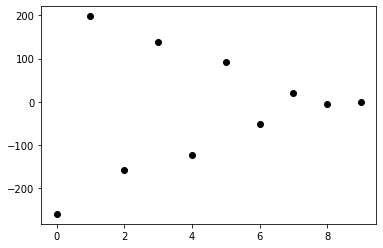

In [139]:
zi = scipy.signal.lfiltic(b, a, df['oGWD'])
plt.plot(zi, 'ko')

In [147]:
#df['oGWD_filt'] = scipy.signal.lfilter(b, a, df['oGWD'])#, zi = zi[0])
df['oGWD_filt'] = scipy.signal.filtfilt(b, a, df['oGWD'])

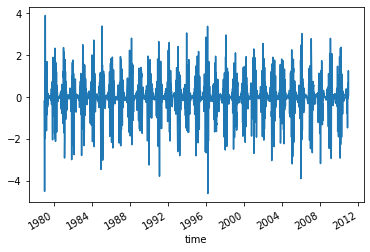

In [148]:
df.set_index('time').oGWD_filt.plot()

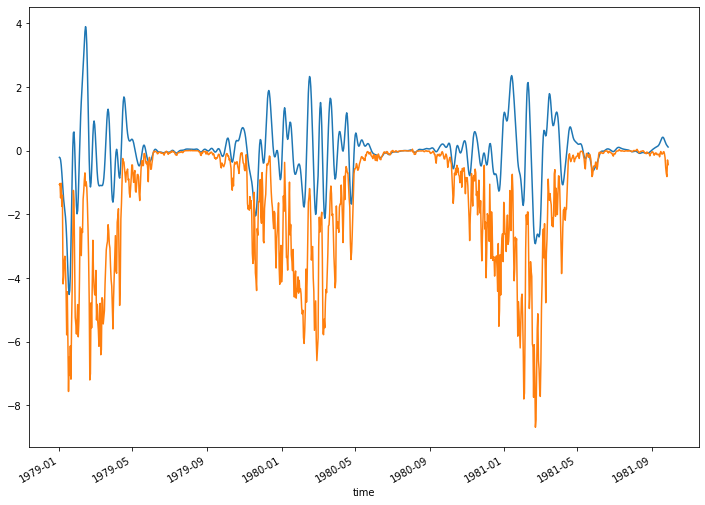

In [150]:
(df.set_index('time').oGWD_filt.iloc[:1000]).plot(figsize = (12,9))
df.set_index('time').oGWD.iloc[:1000].plot(figsize = (12,9))

In [126]:
curves = [
    hv.Curve(
        data=df,
        kdims=['time'],
        vdims=V,
        label=filtered,
    ).opts(
        frame_height=300,
        frame_width=575,
        show_grid=True,
    )
    for filtered, V in zip(['unfiltered', 'filtered'], ['oGWD', 'oGWD_filt'])
]

hv.Overlay(curves)

:Overlay
   .Curve.Unfiltered :Curve   [time]   (oGWD)
   .Curve.Filtered   :Curve   [time]   (oGWD_filt)

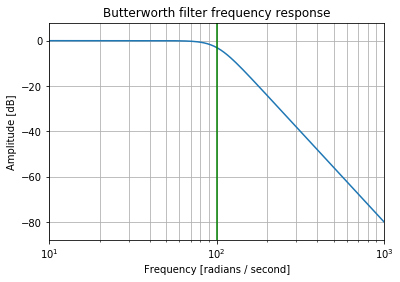

In [39]:
>>> b, a = scipy.signal.butter(4, 100, 'low', analog=True)
>>> w, h = scipy.signal.freqs(b, a)
>>> plt.semilogx(w, 20 * np.log10(abs(h)))
>>> plt.title('Butterworth filter frequency response')
>>> plt.xlabel('Frequency [radians / second]')
>>> plt.ylabel('Amplitude [dB]')
>>> plt.margins(0, 0.1)
>>> plt.grid(which='both', axis='both')
>>> plt.axvline(100, color='green') # cutoff frequency
>>> plt.show()


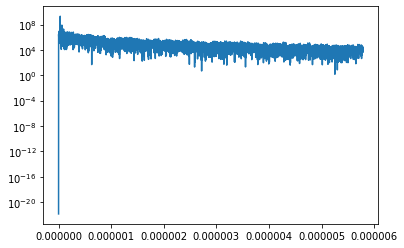

In [19]:
f, psd = scipy.signal.periodogram(df['oGWD'], fs=sampling_freq)
plt.semilogy(f, psd)
f, psd = scipy.signal.periodogram(df['oGWD_filt'], fs=sampling_freq)
plt.semilogy(f, psd)

(1, 104701910961.12607)

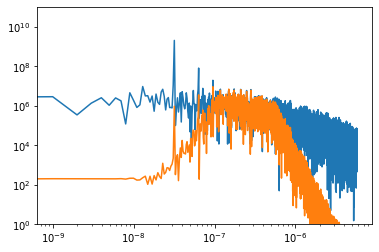

In [129]:
f, psd = scipy.signal.periodogram(df['oGWD'], fs=sampling_freq)
plt.loglog(f, psd)
f, psd = scipy.signal.periodogram(df['oGWD_filt'], fs=sampling_freq)
plt.loglog(f, psd)
plt.ylim(1,)

# Finding the spikes

/home/kuchar/.conda/envs/moje/lib/python3.9/site-packages/bokeh_catplot/__init__.py:13: DeprecationWarning: bokeh-catplot is deprecated. Use iqplot instead.
  warnings.warn("bokeh-catplot is deprecated. Use iqplot instead.", DeprecationWarning)
/home/kuchar/.conda/envs/moje/lib/python3.9/site-packages/holoviews/operation/datashader.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Callable
/home/kuchar/.conda/envs/moje/lib/python3.9/site-packages/nbconvert/exporters/html.py:100: DeprecationWarning: 'contextfilter' is renamed to 'pass_context', the old name will be removed in Jinja 3.1.
  def markdown2html(self, context, source):
/home/kuchar/.conda/envs/moje/lib/python3.9/site-packages/panel/io/resources.py:39: DeprecationWarning: 'jinja2.Markup' is deprecated and will be removed in Jinja 3.1. Import 'markupsafe.Markup' instead.
  _env.filt

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
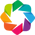

Loading BokehJS ...

In [4]:
import bokeh_catplot
from bokeh.models import Span
import holoviews as hv
import holoviews.operation.datashader
hv.extension('bokeh')
from bokeh.plotting import figure, output_file, save
import bokeh
bokeh.io.output_notebook()

In [7]:
thresh = -6.66

# Amount of time in seconds to keep on either side of spike
time_window_left = 10
time_window_right = 10

# Number of samples to keep on either side of spike
sampling_freq_days = sampling_freq*24*3600
n_window_left = int(time_window_left * sampling_freq_days)
n_window_right = int(time_window_right * sampling_freq_days)

# DataFrame to store spikes
df_spike = pd.DataFrame(columns=['spike', 't (day)', 'oGWD (m/s/day)'])

# Use a NumPy array for speed in looping
V = df['oGWD'].values

# Initialize while loop
i = 1
spike = 0
while i < len(df):
    if V[i] < thresh:
        # Found a spike, get crossings
        cross_1 = i
        while V[i] < thresh:
            i += 1
        cross_2 = i

        # Store perintent quantities in DataFrame
        t_in = df['time'][cross_1-n_window_left:cross_2+n_window_right]
        V_in = df['oGWD'][cross_1-n_window_left:cross_2+n_window_right]
        data={'t (day)': t_in,
              'oGWD (m/s/day)': V_in,
              'spike': spike * np.ones_like(t_in, dtype=int)}
        df_add = pd.DataFrame(data)
        df_spike = pd.concat((df_spike, df_add), sort=True)

        spike += 1

    i += 1

In [8]:
df_spike["relative time (day)"] = df_spike.groupby("spike")["t (day)"].transform(
    lambda x: np.arange(len(x)) / sampling_freq_days
)

In [9]:
df_spike.head(30)

oGWD (m/s/day) spike    t (day)  relative time (day)
5        -1.401016     0 1979-01-06                  0.0
6        -4.186739     0 1979-01-07                  1.0
7        -3.992506     0 1979-01-08                  2.0
8        -3.471819     0 1979-01-09                  3.0
9        -3.316940     0 1979-01-10                  4.0
10       -3.679033     0 1979-01-11                  5.0
11       -4.376801     0 1979-01-12                  6.0
12       -5.787531     0 1979-01-13                  7.0
13       -4.433308     0 1979-01-14                  8.0
14       -6.083216     0 1979-01-15                  9.0
15       -7.567315     0 1979-01-16                 10.0
16       -6.492792     0 1979-01-17                 11.0
17       -7.063795     0 1979-01-18                 12.0
18       -6.137473     0 1979-01-19                 13.0
19       -7.180131     0 1979-01-20                 14.0
20       -5.497491     0 1979-01-21                 15.0
21       -4.335624     0 1979-01-22                 16.0
22       -2.696052     0 1979-01-23                 17.0
23       -1.247842     0 1979-01-24                 18.0
24       -1.533956     0 1979-01-25                 19.0
25       -3.476580     0 1979-01-26                 20.0
7        -3.992506     1 1979-01-08                  0.0
8        -3.471819     1 1979-01-09                  1.0
9        -3.316940     1 1979-01-10                  2.0
10       -3.679033     1 1979-01-11                  3.0
11       -4.376801     1 1979-01-12                  4.0
12       -5.787531     1 1979-01-13                  5.0
13       -4.433308     1 1979-01-14                  6.0
14       -6.083216     1 1979-01-15                  7.0
15       -7.567315     1 1979-01-16                  8.0

## Visualization

In [16]:
p

/home/kuchar/.conda/envs/moje/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='relative time (day)'>

/home/kuchar/.conda/envs/moje/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='relative time (day)'>

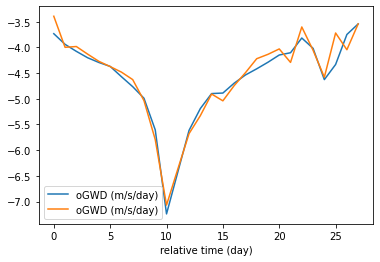

In [18]:
p = df_spike.groupby('relative time (day)').mean().plot()
df_spike.groupby('relative time (day)').median().plot(ax = p, label = 'median')

In [20]:
df_spike[df_spike['relative time (day)'] <= 20]

oGWD (m/s/day) spike    t (day)  relative time (day)
5           -1.401016     0 1979-01-06                  0.0
6           -4.186739     0 1979-01-07                  1.0
7           -3.992506     0 1979-01-08                  2.0
8           -3.471819     0 1979-01-09                  3.0
9           -3.316940     0 1979-01-10                  4.0
...               ...   ...        ...                  ...
11383       -3.472941    79 2010-03-10                 16.0
11384       -3.588426    79 2010-03-11                 17.0
11385       -4.248170    79 2010-03-12                 18.0
11386       -3.784435    79 2010-03-13                 19.0
11387       -2.361301    79 2010-03-14                 20.0

[1680 rows x 4 columns]

In [68]:
ds = hv.Dataset(df_spike[df_spike['relative time (day)'] <= 20], ['relative time (day)', 'spike'], ['oGWD (m/s/day)'])
ds

/home/kuchar/.conda/envs/moje/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


:Dataset   [relative time (day),spike]   (oGWD (m/s/day))

In [74]:
agg = ds.aggregate('relative time (day)', function=np.mean, spreadfn=np.std)
errorbars = hv.ErrorBars(agg,vdims=['oGWD (m/s/day)', 'oGWD (m/s/day)_std'])
hv_c = hv.Curve(
    data=df_spike[df_spike['relative time (day)'] <= 20],
    kdims=['relative time (day)'],
    vdims=['oGWD (m/s/day)', 'spike']
).groupby(
    'spike'
).opts(
    hv.opts.Curve(
        alpha=0.1,
        frame_height=300,
        frame_width=775,
        color='blue',
        line_width=5,
        show_grid=True,
    )
)

hv_c = hv.Curve(
    ds).groupby(
    'spike'
).opts(
    hv.opts.Curve(
        alpha=0.1,
        frame_height=300,
        frame_width=775,
        color='blue',
        line_width=5,
        show_grid=True,
    )
)

overlay =  (hv_c.overlay() * hv.Curve(agg, label = 'mean').opts(line_width=8)  * errorbars)#.redim.range(measles=(0, None))

overlay.opts(width=600, tools=['hover'])

/home/kuchar/.conda/envs/moje/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


:Overlay
   .NdOverlay.I :NdOverlay   [spike]
      :Curve   [relative time (day)]   (oGWD (m/s/day))
   .Curve.Mean  :Curve   [relative time (day)]   (oGWD (m/s/day),oGWD (m/s/day)_std)
   .ErrorBars.I :ErrorBars   [relative time (day)]   (oGWD (m/s/day),oGWD (m/s/day)_std)

In [62]:
hv.Curve(
    data=df_spike[df_spike['relative time (day)'] <= 20],
    kdims=['relative time (day)'],
    vdims=['oGWD (m/s/day)', 'spike']
).groupby(
    'spike'
).opts(
    hv.opts.Curve(
        alpha=0.1,
        frame_height=300,
        frame_width=775,
        color='blue',
        line_width=5,
        show_grid=True,
    )
).overlay()

/home/kuchar/.conda/envs/moje/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


:NdOverlay   [spike]
   :Curve   [relative time (day)]   (oGWD (m/s/day),spike)

In [62]:
def local_min(x, y):
    """
    Locally approximate minimum as quadratic
    and return location of minimum.
    """
    minind = np.argmin(y)
    
    y_vals = y[minind-1:minind+2]
    x_vals = x[minind-1:minind+2]
    #print(minind, x_vals, y_vals)
    a, b, c = np.polyfit(x_vals, y_vals, 2)

    return -b / 2 / a

In [140]:
df_spike['spike'].unique()

/home/kuchar/.conda/envs/moje/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79], dtype=object)

In [64]:
# Array to hold spike positions
spikes = np.empty(len(df_spike['spike'].unique()))

# Compute spike positions
for i, spike in enumerate(df_spike['spike'].unique()):
    #print(i)
    inds = df_spike['spike'] == spike
    temp = df_spike['t (day)'][inds]
    #z = temp.iloc[0]#.astype(t.dtype)
    #plt_dates = (temp - z)/ np.timedelta64(1,'D')
    plt_dates = dates.date2num(temp.values)
    try:
        spikes[i] = local_min(plt_dates,
                          df_spike['oGWD (m/s/day)'][inds].values)
    except:
        pass

# Compute interspike times
interspike_times = np.diff(spikes)



In [110]:
df_it = pd.DataFrame({'its': interspike_times})
df_it['']
df_it.head()

its
0    0.000000
1    0.000000
2   35.346006
3  712.962515
4   18.976608

its    22.949403
dtype: float64

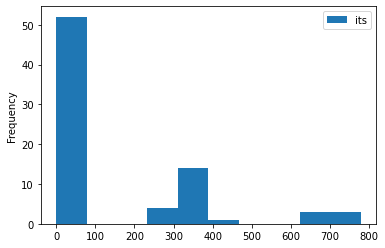

In [122]:
mask = df_it['its'].abs() <= 2500
df_it[mask].plot.hist()
df_it[mask].median()

In [123]:
df_it.median()

/home/kuchar/.conda/envs/moje/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


its    22.949403
dtype: float64

<AxesSubplot:ylabel='Frequency'>

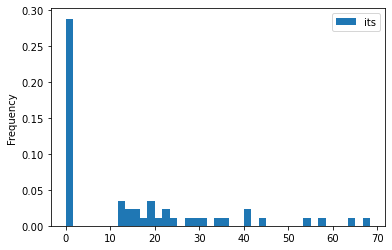

In [139]:
mask = df_it['its'].abs() <= 200
df_it[mask].plot.hist(density=True, bins = 41)


In [142]:
output_file(filename="ecdf_interpeak_times.html", title="Interpeak-times HTML file")
#p = figure(sizing_mode="stretch_width", max_width=500, plot_height=250)
kwargs = dict(x_axis_label = 'interpeak time [day]')

p = bokeh_catplot.ecdf(df_it,
                       val='its',
                       x_axis_type='log',
                       tooltips=[("interpeak time [day]","@its")],
                       frame_width=500, **kwargs
                       )
#hline = Span(location=0.5, dimension='width', line_color='green', line_width=3)
#p.renderers.extend([p, hline])
#p.ray(x=[0], y=[0.5], length=0, angle=0, line_width=1)
#bokeh.io.show(p)
save(p)

'/home/kuchar/notebooks/ecdf_interpeak_times.html'

### using iqplot

In [94]:
import iqplot

In [105]:
bc_kwargs = dict(
    align="end", frame_height=150, frame_width=400, title="iqplot",
    x_axis_type = 'log'
)
p = iqplot.ecdf(data=df_it[mask], q="its", conf_int = True, **bc_kwargs)
bokeh.io.show(p)


/home/kuchar/.conda/envs/moje/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/kuchar/.conda/envs/moje/lib/python3.9/site-packages/iqplot/dist.py:182: UserWarning: Cannot draw confidence intervals with a x-axis on a log scale because some values are negative. Any negative values will be omitted from the ECDF.
  warnings.warn(
